In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice
sns.set(style="whitegrid")


In [ ]:
# Load Titanic dataset
df = sns.load_dataset("titanic")

# View first few rows
df.head()


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe(include="all")


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['sex'].value_counts()
df['class'].value_counts()
df['survived'].value_counts()


survived
0    549
1    342
Name: count, dtype: int64

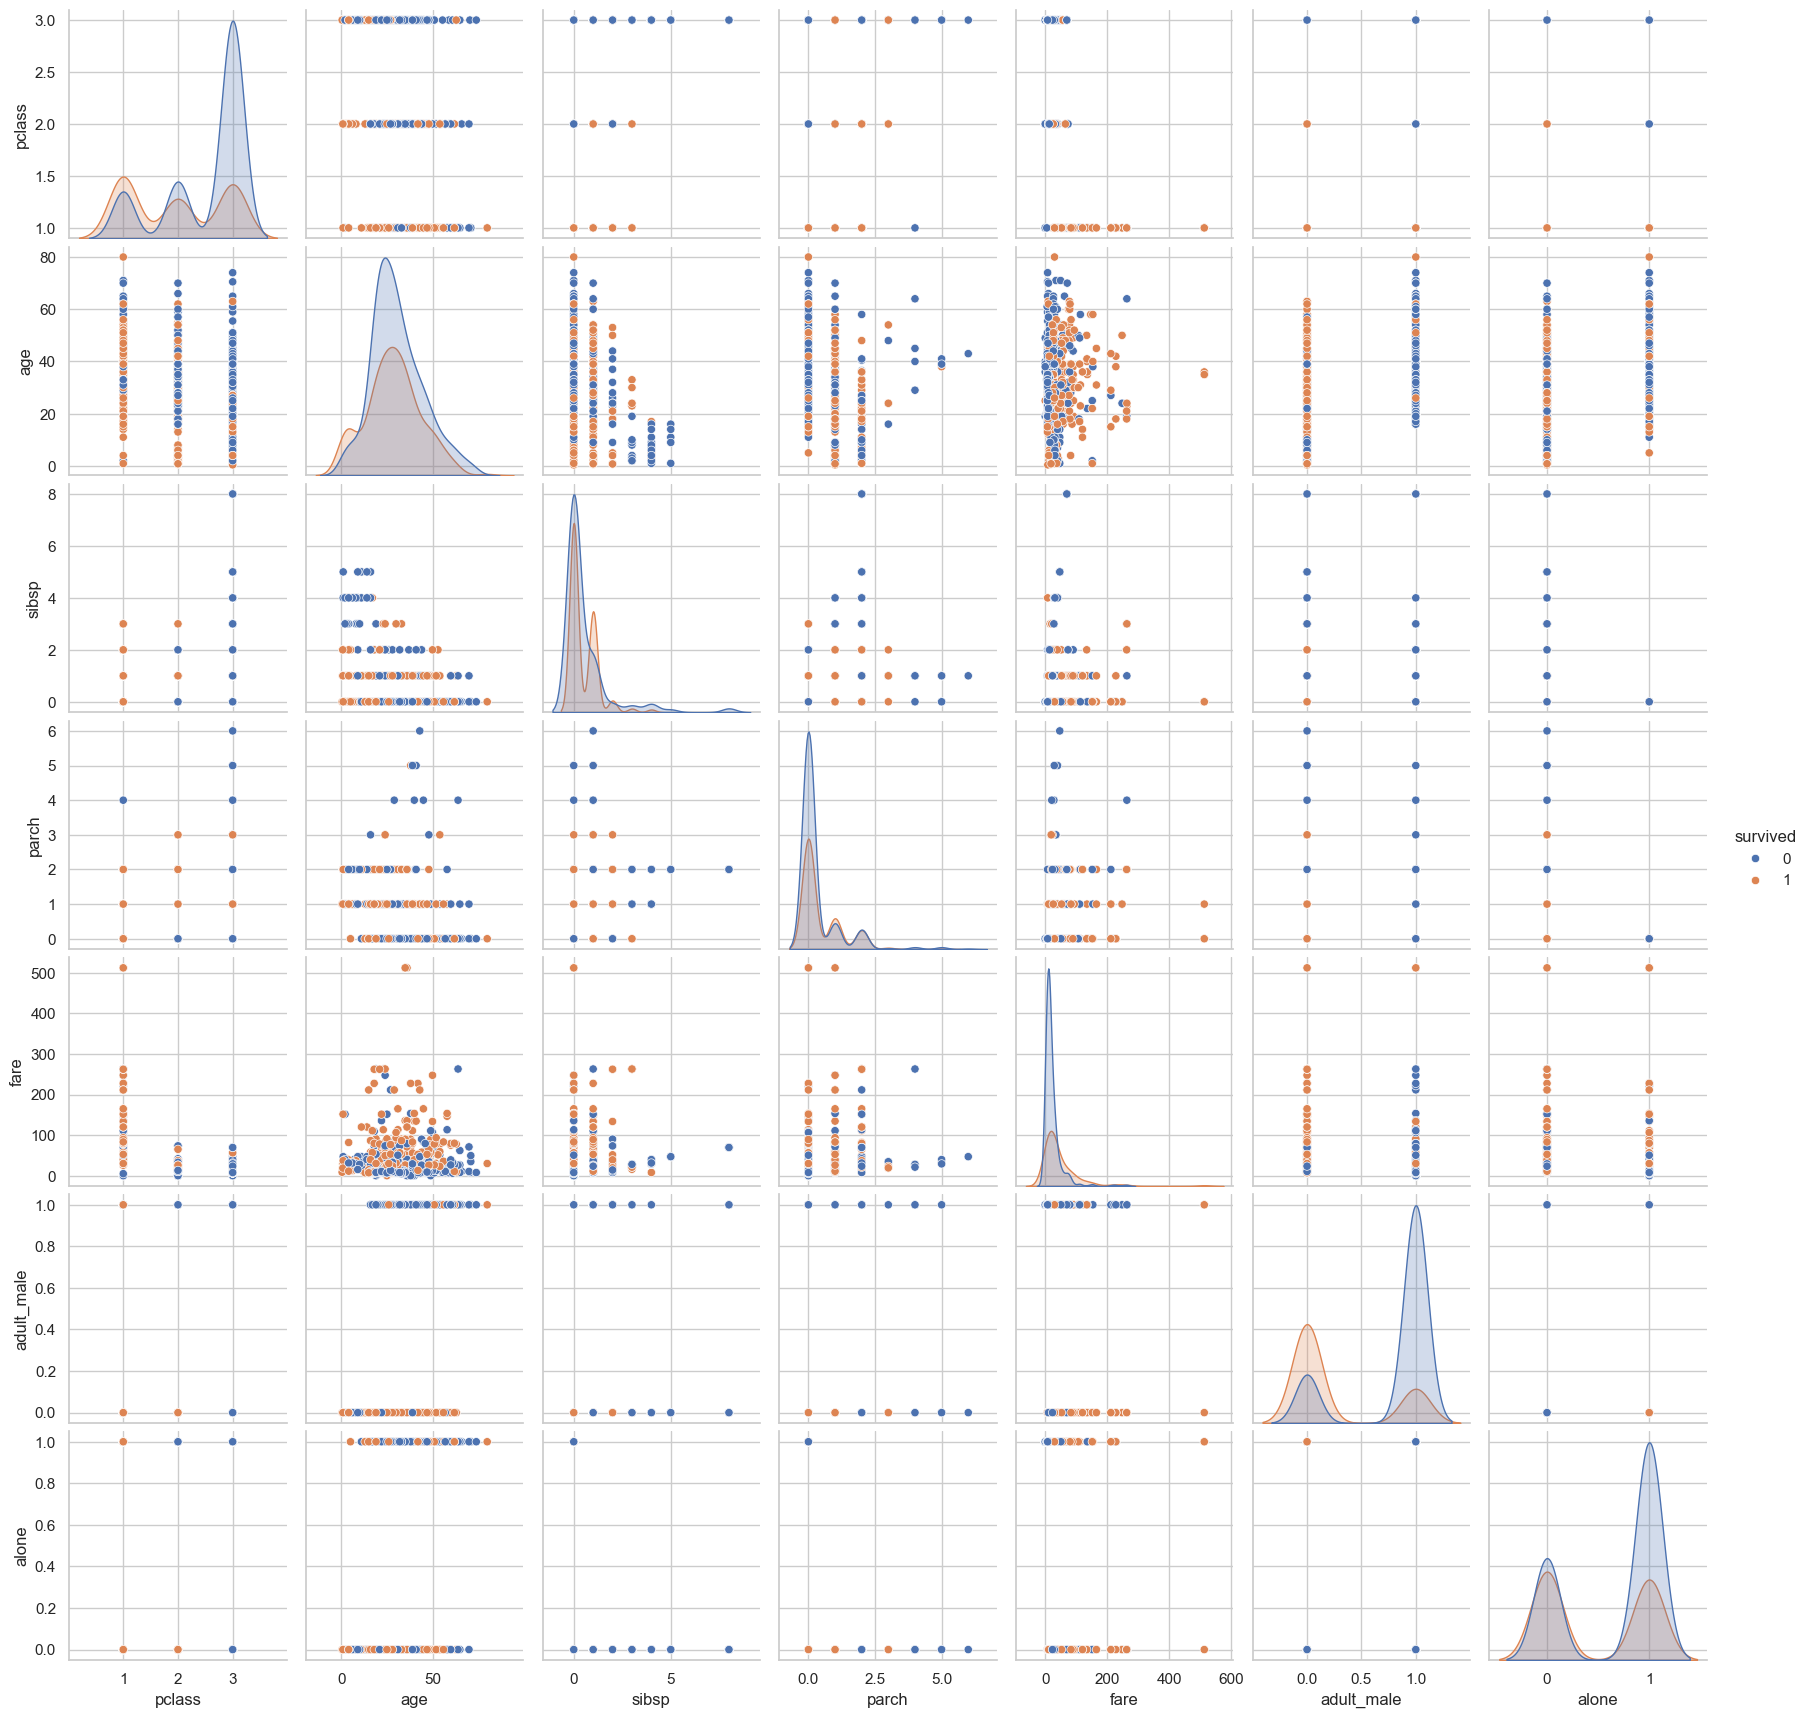

In [6]:
sns.pairplot(df, hue='survived', diag_kind='kde')
plt.show()


Observations:

Passengers who paid higher fares had higher survival chances.

Age doesn’t show a very strong relationship with survival, but younger passengers seem slightly more likely to survive.

Class and fare are clearly related — higher-class passengers paid higher fares and had better survival rates.

The diagonal (KDE) plots show the distribution of each variable, where survivors (orange) tend to have higher fares and slightly younger ages.

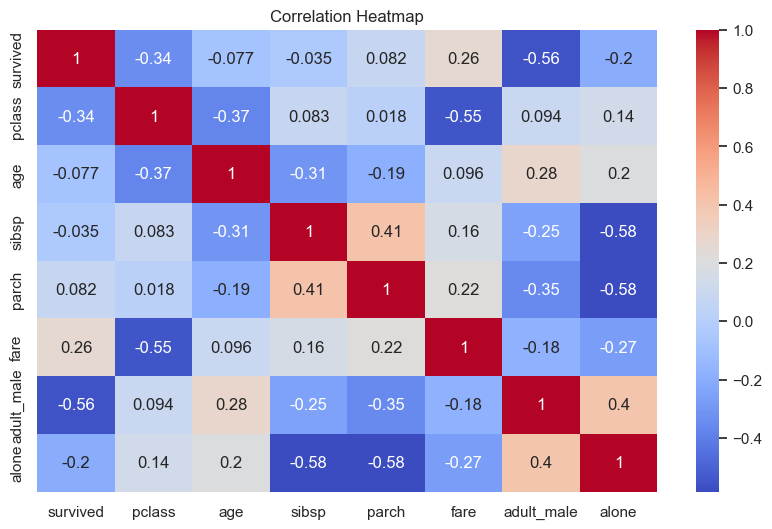

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Observations:

fare and pclass have a strong negative correlation (~ -0.55), meaning higher class → higher fare.

survived is positively correlated with fare (~0.26) and negatively with pclass (~ -0.34).

Weak correlations between age and survival suggest age alone wasn’t a strong predictor.

No extreme correlations indicating multicollinearity issues among numeric variables.

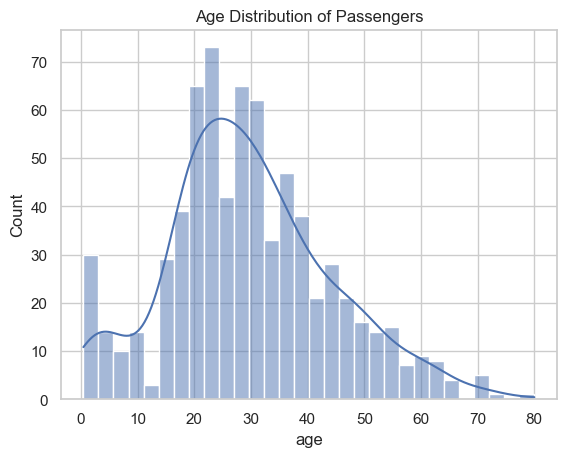

In [8]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


Observations:

Most passengers were between 20 and 40 years old.

The distribution is slightly right-skewed, indicating fewer older passengers.

Some younger children (below 10 years) were present as well.

This age pattern is typical of working-age travelers during that period.

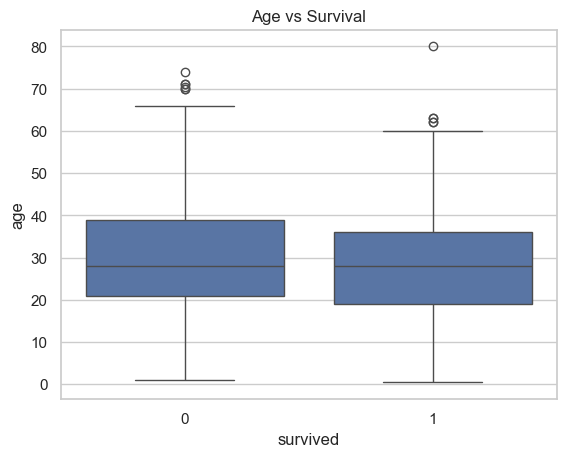

In [9]:
sns.boxplot(x='survived', y='age', data=df)
plt.title("Age vs Survival")
plt.show()


Observations:

Median age of survivors is slightly lower than non-survivors.

The age range for both groups overlaps heavily, showing age alone didn’t determine survival.

A few older passengers did survive, but they are outliers.

Younger passengers (especially children) show a slightly higher survival tendency.

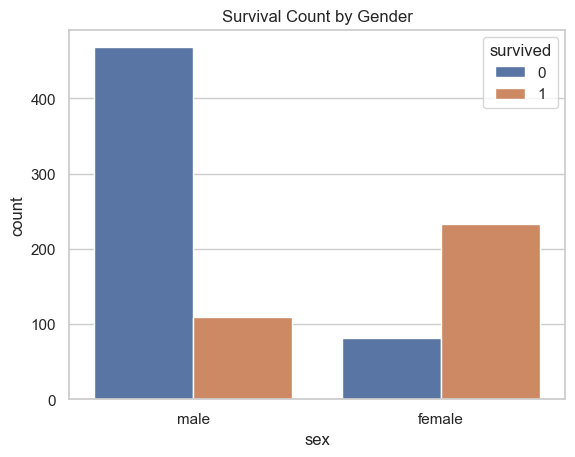

In [10]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival Count by Gender")
plt.show()


Observations:

Significantly more males were on board, but most non-survivors were male.

Females had a much higher survival rate compared to males.

This reflects the "women and children first" evacuation policy followed during the disaster.

Gender appears to be one of the strongest predictors of survival.

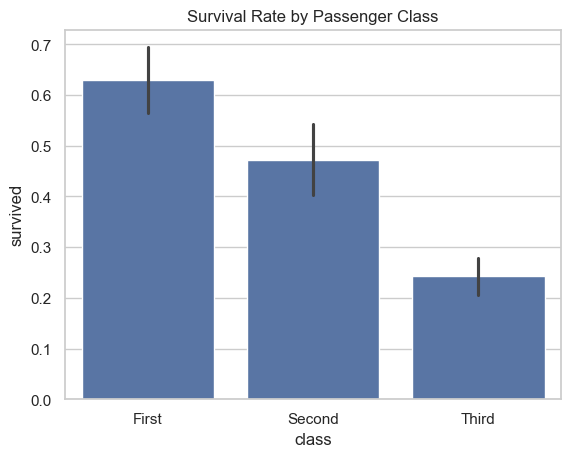

In [11]:
sns.barplot(x='class', y='survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


Observations:

First-class passengers had the highest survival rate (~63%).

Second-class passengers had a moderate survival rate (~47%).

Third-class passengers had the lowest survival rate (~24%).

This shows strong social/economic disparity in survival chances — higher-class passengers were closer to lifeboats and had better access to rescue.

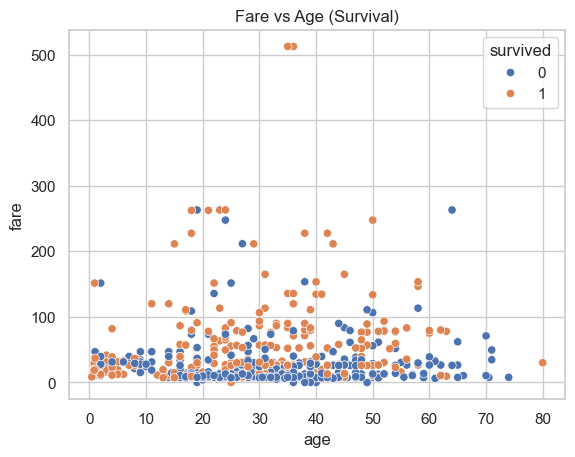

In [12]:
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Fare vs Age (Survival)")
plt.show()


In [ ]:
Observations:

Survivors (orange points) tend to cluster in higher fare regions.

There’s no clear linear relationship between age and fare, but survival is more frequent among those who paid higher fares (typically first class).

Many passengers with low fares (third class) did not survive.

The plot highlights how socioeconomic status (fare) had a strong impact on survival outcomes.

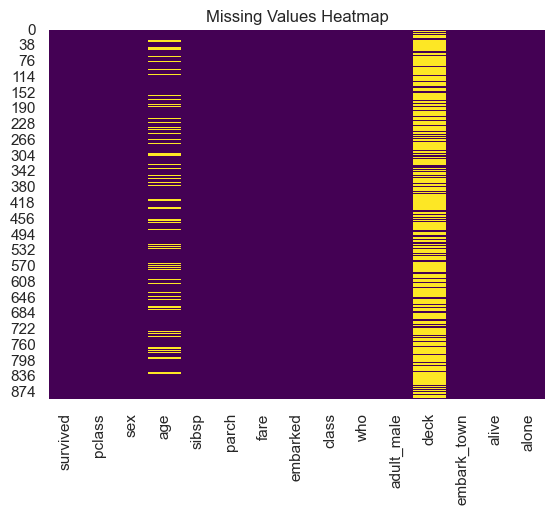

In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


Observations:

Columns like age, deck, and embarked have missing values.

deck has a large proportion of missing entries (~77%).

Missing age values could slightly affect survival analysis, so imputation or removal may be required.

Understanding missingness helps improve model performance later.

In [14]:
df.groupby('sex')['survived'].mean()
df.groupby('class')['fare'].mean()


C:\Users\ammar\AppData\Local\Temp\ipykernel_3112\2858661661.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['fare'].mean()


class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64